## Test ground for all data path handles

In [1]:
DAT = '/mnt/d/data_large/unwise_sz/'

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename_list = os.listdir(DAT+'ACT/deprojections/cib_cibdbeta/') 

In [3]:
print('Number of files:', len(filename_list))

for i, filename in enumerate(filename_list):
    nameparts = filename.split('_')
    print(i,'nu=',float(nameparts[-2]),'T=',float(nameparts[-1][:-5]))

Number of files: 18
0 nu= 1.0 T= 10.7
1 nu= 1.0 T= 24.0
2 nu= 1.15 T= 24.0
3 nu= 1.2 T= 10.7
4 nu= 1.2 T= 24.0
5 nu= 1.3 T= 24.0
6 nu= 1.35 T= 24.0
7 nu= 1.45 T= 24.0
8 nu= 1.4 T= 10.7
9 nu= 1.4 T= 24.0
10 nu= 1.6 T= 10.7
11 nu= 1.6 T= 24.0
12 nu= 1.7 T= 10.7
13 nu= 1.7 T= 24.0
14 nu= 1.8 T= 10.7
15 nu= 1.8 T= 24.0
16 nu= 2.0 T= 10.7
17 nu= 2.0 T= 24.0


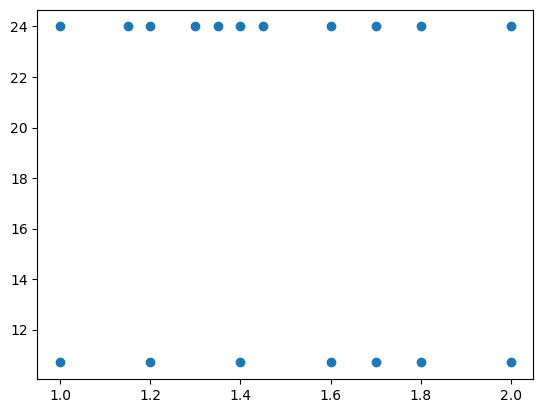

In [4]:
nu  = [float(name.split('_')[-2]) for name in filename_list]
T   = [float(name.split('_')[-1][:-5]) for name in filename_list]

plt.scatter(nu, T)

In [5]:
print(filename_list[0])

ilc_actplanck_ymap_deproj_cib_cibdBeta_1.0_10.7.fits


In [6]:
import assets.deprojection_index as dedex

codex = dedex.get_ymap_index_act()

In [7]:
for item in codex:
    path = item.path
    nu = item.nu
    T = item.T
    print(path, nu, T)

/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.0_10.7.fits 1.0 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.0_24.0.fits 1.0 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.2_10.7.fits 1.2 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.2_24.0.fits 1.2 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.4_10.7.fits 1.4 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.4_24.0.fits 1.4 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.6_10.7.fits 1.6 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.6_24.0.fits 1.6 24.0
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_deproj_cib_1.7_10.7.fits 1.7 10.7
/mnt/d/data_large/unwise_sz/ACT/deprojections/cib/ilc_actplanck_ymap_depr

In [8]:
from assets import make_galaxy_map as galmake
import healpy as hp

Reading weights...
Reading mask...
Making galaxy map 1


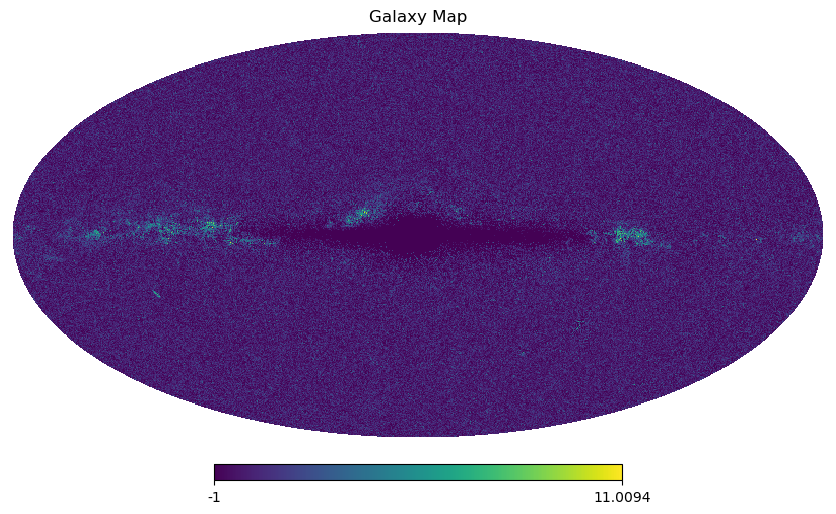

In [9]:
galaxy = galmake.makemap(1)
hp.mollview(galaxy, title='Galaxy Map')

In [10]:
from astropy.io import fits

print('Reading mask...')
mask = hp.read_map(galmake.pathmask)
lost = fits.open(galmake.lostmap)
mask_lost = lost[0].data
invalid = mask_lost == 0

galmask = mask * invalid
# hp.mollview(galmask, title='Galaxy Mask')

Reading mask...


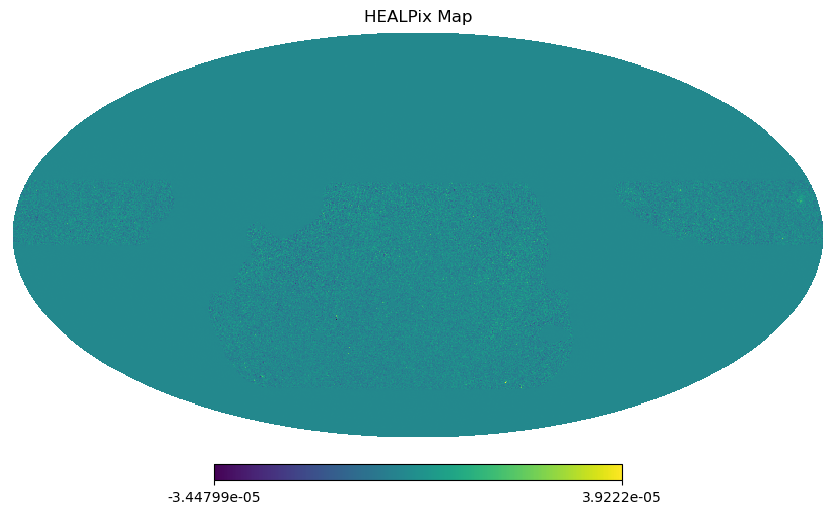

In [18]:
from astropy.io import fits
from pixell import enmap, utils, reproject, wcsutils

item = codex[0]
path = item.path

with fits.open(path) as hdulist:
    data = hdulist[0].data
    header = hdulist[0].header

# Create an enmap object from the data and WCS header
wcs = wcsutils.WCS(header)
flat_map = enmap.ndmap(data, wcs)

# Set the desired HEALPix resolution (nside)
nside = 512  # You can choose an appropriate nside for your use case

# Convert the enmap to a HEALPix map using reproject.enmap2healpix
healpix_map = reproject.healpix_from_enmap(flat_map, nside=nside, lmax=3*nside-1)

# Save the HEALPix map to a FITS file
hp.mollview(healpix_map, title='HEALPix Map')